<a href="https://colab.research.google.com/github/Simmetria0/tutorialsColab/blob/master/Tutorial_1_on_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 1 on Machine learning 
### Diego Tuccillo


## 1) Define the problem


In this "hello world" of deep learning we are goung to solve the problem of classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9). The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. 

You can think of "solving" MNIST as the "Hello World" of deep learning.


![alternate text](http://simmetria0.altervista.org/Tutorial_1_DL/mnist_example.png)





We are going to solve this problem using a Neural Network (not deep) using Keras.





In [0]:
# The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

(60000, 28, 28)


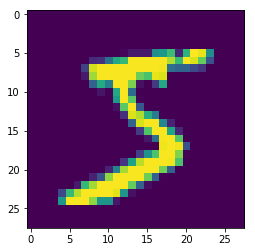

In [10]:
# let's have a look at the data sample

print (train_images.shape)

import matplotlib.pyplot as plt


plt.imshow(train_images[0,:,:])





In [13]:
# and the train_labels set
train_labels.shape


(60000,)

***

## Note that you had:

**(train_images, train_labels), 
(test_images, test_labels) **

Why?

***


In [14]:
#let's built the model

from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


***

# What are we doing?


![alternate text](http://simmetria0.altervista.org/Tutorial_1_DL/NN.png)




So now we have the NN STRUCTURE ready.

To make it work we need a "fitting" method, i.e. to define HOW the NN learn.


This is done defining:





1. **A loss function**: that is is how the network will be able to MEASURE how good a job it is doing on its training data.

2. **An optimizer**: this is the mechanism through which the network will update itself based on the results obtained with the loss function.

3. **A metrics**: to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly classified).



Note that the loss function is used to optimize your model. This is the function that will get minimized by the optimizer.

A metric is used to judge the performance of your model. This is only for you to look at and has nothing to do with the optimization process.






In [0]:
#we do this using this simple command:

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# Now we are ready!
# We have just to put the data in the right shape to feed the NN and we are ready:


train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255



#We also need to categorically encode the labels

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)






In [30]:
print (train_images.shape)

print(train_labels.shape)

train_labels[0,:]



(60000, 784)
(60000, 10)


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [31]:
#We are now ready to train our network, which in Keras is done via a call to the fit method of the network: we "fit" the model to its training data.

network.fit(train_images, train_labels, epochs=5, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.2559 - acc: 0.9253
Epoch 2/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.1020 - acc: 0.9694
Epoch 3/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.0667 - acc: 0.9800
Epoch 4/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.0487 - acc: 0.9851
Epoch 5/5
60000/60000 [==============================] - 6s 97us/step - loss: 0.0360 - acc: 0.9889


***

Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over the training data.

Let's see now if the network can GENERILIZE what it learn

***

In [33]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

print('test accuracy:', test_acc)


10000/10000 [==============================] - 0s 49us/step
test accuracy: 0.9797
